# Setup

In [4]:
import cupy as cp
import numpy as np

if cp.cuda.is_available():
	print("GPU is available")
	print("GPU: ", cp.cuda.runtime.getDeviceProperties(0)['name'])
import os
import tempfile
from IPython.display import HTML, display
import h5py
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["figure.figsize"] = (5, 4)

import tdgl
from tdgl.geometry import box, circle
from tdgl.visualization.animate import create_animation

MAKE_ANIMATIONS = True


tempdir = tempfile.TemporaryDirectory()

def make_video_from_solution(
	solution,
	quantities=("order_parameter", "phase"),
	fps=30,
	figsize=(5, 4),
	cmap=None,
	vmin_a=None,
	vmax_a=None,
	cmap_b=None,
	):
	"""Generates an HTML5 video from a tdgl.Solution."""
	with tdgl.non_gui_backend():
		with h5py.File(solution.path, "r") as h5file:
			print(cmap_b)
			anim = create_animation(
				h5file,
				quantities=quantities,
				fps=fps,
				figure_kwargs=dict(figsize=figsize, dpi=100),
				vmin=vmin_a,
				vmax=vmax_a,
				cmap=cmap_b,
			)
			video = anim.to_html5_video()
		return HTML(video)
	

	

GPU is available
GPU:  b'NVIDIA GeForce RTX 4060 Laptop GPU'


# Physical properties

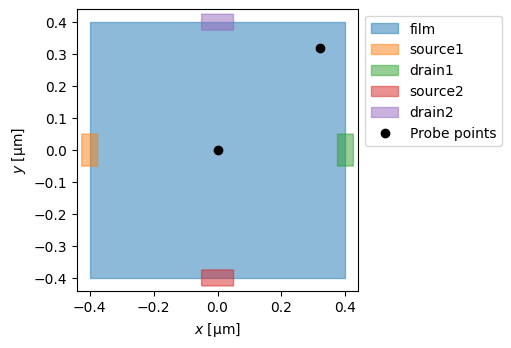

In [5]:
length_units = "um"
# Material parameters
xi = 0.1
london_lambda = 2
d = 0.1
layer = tdgl.Layer(coherence_length=xi, london_lambda=london_lambda, thickness=d, gamma=1)

width = 0.8
height = 0.8

film = tdgl.Polygon('film', points=box(width, height)).resample(401).buffer(0)


source1 = tdgl.Polygon('source1', points=box(0.05,0.1)).translate(-width/2, 0 ).buffer(0)
drain1 = tdgl.Polygon('drain1', points=box(0.05,0.1)).translate(width/2, 0 ).buffer(0)
source2 = tdgl.Polygon('source2', points=box(0.1,0.05)).translate(0,-height/2 ).buffer(0)
drain2 = tdgl.Polygon('drain2', points=box(0.1,0.05)).translate(0,height/2).buffer(0)


device=tdgl.Device("2currents",
				   layer=layer 
				   ,film=film
				   ,terminals= [source1,drain1,source2,drain2]
				   ,length_units=length_units
				   ,probe_points=[((0, 0),(width*(0.4),height*(0.4)))]
				   )

fig,ax=device.draw()

Constructing Voronoi polygons: 100%|██████████| 3944/3944 [00:01<00:00, 2191.69it/s]


num_sites: 3944
num_elements: 7486
min_edge_length: 0.005030606216198351
max_edge_length: 0.0256909190920232
mean_edge_length: 0.013782078122297928
min_area: 1.3987163596122863e-05
max_area: 0.00035275310969192143
mean_area: 0.0001622718052738337
coherence_length: 0.1
length_units: um


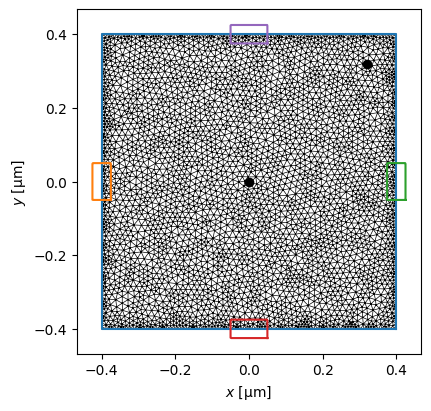

In [6]:
device.make_mesh(max_edge_length=xi / 4, smooth=100)
device.mesh_stats(print_b=True)
fig, ax = device.plot(mesh=True, legend=False)

In [ ]:


import tdgl.sources


options = tdgl.SolverOptions(
    solve_time=200,
    # output_file=os.path.join(tempdir.name, "weak-link-zero-current.h5"),
    field_units = "mT",
    current_units="uA",

)
applied_vector_potential=tdgl.sources.constant.ConstantField(30,field_units=options.field_units,length_units=device.length_units)

currents=np.linspace(0.0, 20,2000 )
voltages=[]
times=[]
solutions=[]
for ii in range(currents.size):

	zero_current_solution = tdgl.solve(
		device=device,
		options=options,
		applied_vector_potential=applied_vector_potential,
		terminal_currents=dict(source1=currents[ii], drain1=-currents[ii],source2=currents[ii],drain2=-currents[ii])
	)
	# fig, axes = zero_current_solution.plot_order_parameter(figsize=(10, 4))
	# voltage=
	voltages.append(zero_current_solution.dynamics.voltage())
	solutions.append(zero_current_solution)
	
	times.append(zero_current_solution.dynamics.time)
	print(ii)


Simulating: 100%|█████████▉| 200/200 [00:28<00:00,  6.95tau/s ]


0


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.87tau/s ]


1


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.77tau/s ]


2


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.79tau/s ]


3


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.76tau/s ]


4


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.66tau/s ]


5


Simulating: 100%|█████████▉| 200/200 [00:28<00:00,  7.07tau/s ]


6


Simulating: 100%|█████████▉| 200/200 [00:28<00:00,  6.91tau/s ]


7


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.77tau/s ]


8


Simulating: 100%|█████████▉| 200/200 [00:28<00:00,  6.92tau/s ]


9


Simulating: 100%|█████████▉| 200/200 [00:28<00:00,  6.93tau/s ]


10


Simulating: 100%|█████████▉| 200/200 [00:28<00:00,  7.09tau/s ]


11


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.87tau/s ]


12


Simulating: 100%|█████████▉| 200/200 [00:28<00:00,  7.06tau/s ]


13


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.85tau/s ]


14


Simulating: 100%|█████████▉| 200/200 [00:28<00:00,  6.91tau/s ]


15


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.88tau/s ]


16


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.56tau/s ]


17


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.64tau/s ]


18


Simulating: 100%|█████████▉| 200/200 [00:28<00:00,  7.04tau/s ]


19


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.83tau/s ]


20


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.78tau/s ]


21


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.84tau/s ]


22


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.79tau/s ]


23


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.63tau/s ]


24


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.65tau/s ]


25


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.78tau/s ]


26


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.74tau/s ]


27


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.81tau/s ]


28


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.48tau/s ]


29


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.77tau/s ]


30


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.73tau/s ]


31


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.57tau/s ]


32


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.75tau/s ]


33


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.74tau/s ]


34


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.61tau/s ]


35


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.59tau/s ]


36


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.63tau/s ]


37


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.65tau/s ]


38


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.71tau/s ]


39


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.54tau/s ]


40


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.56tau/s ]


41


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.55tau/s ]


42


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.75tau/s ]


43


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.49tau/s ]


44


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.57tau/s ]


45


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.48tau/s ]


46


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.43tau/s ]


47


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.17tau/s ]


48


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.26tau/s ]


49


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.21tau/s ]


50


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.25tau/s ]


51


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.08tau/s ]


52


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.33tau/s ]


53


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.07tau/s ]


54


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.22tau/s ]


55


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.18tau/s ]


56


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.28tau/s ]


57


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.25tau/s ]


58


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.34tau/s ]


59


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.32tau/s ]


60


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.24tau/s ]


61


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.24tau/s ]


62


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.28tau/s ]


63


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.37tau/s ]


64


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.36tau/s ]


65


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.43tau/s ]


66


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.40tau/s ]


67


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.50tau/s ]


68


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.54tau/s ]


69


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.43tau/s ]


70


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.54tau/s ]


71


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.50tau/s ]


72


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.70tau/s ]


73


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.60tau/s ]


74


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.63tau/s ]


75


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.73tau/s ]


76


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.62tau/s ]


77


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.69tau/s ]


78


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.59tau/s ]


79


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.73tau/s ]


80


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.62tau/s ]


81


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.61tau/s ]


82


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.48tau/s ]


83


Simulating: 100%|█████████▉| 200/200 [00:29<00:00,  6.71tau/s ]


84


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.54tau/s ]


85


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.53tau/s ]


86


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.56tau/s ]


87


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.57tau/s ]


88


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.45tau/s ]


89


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.43tau/s ]


90


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.43tau/s ]


91


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.41tau/s ]


92


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.39tau/s ]


93


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.44tau/s ]


94


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.31tau/s ]


95


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.33tau/s ]


96


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.16tau/s ]


97


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.24tau/s ]


98


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.29tau/s ]


99


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.41tau/s ]


100


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.45tau/s ]


101


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.31tau/s ]


102


Simulating: 100%|█████████▉| 200/200 [00:30<00:00,  6.46tau/s ]


103


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.40tau/s ]


104


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.19tau/s ]


105


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.30tau/s ]


106


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.10tau/s ]


107


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.21tau/s ]


108


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.09tau/s ]


109


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.19tau/s ]


110


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.26tau/s ]


111


Simulating: 100%|█████████▉| 200/200 [00:31<00:00,  6.27tau/s ]


112


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.23tau/s ]


113


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.12tau/s ]


114


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.09tau/s ]


115


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.14tau/s ]


116


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.08tau/s ]


117


Simulating: 100%|█████████▉| 200/200 [00:33<00:00,  6.02tau/s ]


118


Simulating: 100%|█████████▉| 200/200 [00:33<00:00,  6.06tau/s ]


119


Simulating: 100%|█████████▉| 200/200 [00:32<00:00,  6.09tau/s ]


120


Simulating: 100%|█████████▉| 200/200 [00:33<00:00,  5.99tau/s ]


121


Simulating: 100%|█████████▉| 200/200 [00:33<00:00,  5.92tau/s ]


122


Simulating: 100%|█████████▉| 200/200 [00:33<00:00,  5.93tau/s ]


123


Simulating: 100%|█████████▉| 200/200 [00:33<00:00,  5.91tau/s ]


124


Simulating: 100%|█████████▉| 200/200 [00:34<00:00,  5.84tau/s ]


125


Simulating: 100%|█████████▉| 200/200 [00:34<00:00,  5.85tau/s ]


126


Simulating: 100%|█████████▉| 200/200 [00:34<00:00,  5.80tau/s ]


127


Simulating: 100%|█████████▉| 200/200 [00:34<00:00,  5.88tau/s ]


128


Simulating: 100%|█████████▉| 200/200 [00:34<00:00,  5.76tau/s ]


129


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.69tau/s ]


130


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.60tau/s ]


131


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.63tau/s ]


132


Simulating: 100%|█████████▉| 200/200 [00:34<00:00,  5.81tau/s ]


133


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.65tau/s ]


134


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.69tau/s ]


135


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.64tau/s ]


136


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.56tau/s ]


137


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.66tau/s ]


138


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.67tau/s ]


139


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.70tau/s ]


140


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.64tau/s ]


141


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.62tau/s ]


142


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.71tau/s ]


143


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.57tau/s ]


144


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.54tau/s ]


145


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.59tau/s ]


146


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.49tau/s ]


147


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.53tau/s ]


148


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.56tau/s ]


149


Simulating: 100%|█████████▉| 200/200 [00:35<00:00,  5.58tau/s ]


150


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.52tau/s ]


151


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.45tau/s ]


152


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.50tau/s ]


153


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.39tau/s ]


154


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.46tau/s ]


155


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.40tau/s ]


156


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.40tau/s ]


157


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.45tau/s ]


158


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.42tau/s ]


159


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.37tau/s ]


160


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.38tau/s ]


161


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.41tau/s ]


162


Simulating: 100%|█████████▉| 200/200 [00:36<00:00,  5.46tau/s ]


163


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.34tau/s ]


164


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.37tau/s ]


165


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.38tau/s ]


166


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.32tau/s ]


167


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.37tau/s ]


168


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.32tau/s ]


169


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.28tau/s ]


170


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.36tau/s ]


171


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.34tau/s ]


172


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.24tau/s ]


173


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.25tau/s ]


174


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.22tau/s ]


175


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.29tau/s ]


176


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.32tau/s ]


177


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.26tau/s ]


178


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.15tau/s ]


179


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.15tau/s ]


180


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.24tau/s ]


181


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.24tau/s ]


182


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.21tau/s ]


183


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.11tau/s ]


184


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.19tau/s ]


185


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.23tau/s ]


186


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.19tau/s ]


187


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.25tau/s ]


188


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.23tau/s ]


189


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.11tau/s ]


190


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.20tau/s ]


191


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.99tau/s ]


192


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.06tau/s ]


193


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.05tau/s ]


194


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.00tau/s ]


195


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.14tau/s ]


196


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.11tau/s ]


197


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.02tau/s ]


198


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.06tau/s ]


199


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.19tau/s ]


200


Simulating: 100%|█████████▉| 200/200 [00:38<00:00,  5.23tau/s ]


201


Simulating: 100%|█████████▉| 200/200 [00:37<00:00,  5.33tau/s ]


202


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.13tau/s ]


203


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.08tau/s ]


204


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.03tau/s ]


205


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.04tau/s ]


206


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.06tau/s ]


207


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.12tau/s ]


208


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.04tau/s ]


209


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.05tau/s ]


210


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.06tau/s ]


211


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.97tau/s ]


212


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.99tau/s ]


213


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.05tau/s ]


214


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  5.00tau/s ]


215


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.95tau/s ]


216


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.01tau/s ]


217


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.09tau/s ]


218


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.97tau/s ]


219


Simulating: 100%|█████████▉| 200/200 [00:39<00:00,  5.01tau/s ]


220


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.99tau/s ]


221


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.92tau/s ]


222


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.98tau/s ]


223


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.90tau/s ]


224


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.88tau/s ]


225


Simulating: 100%|█████████▉| 200/200 [00:40<00:00,  4.95tau/s ]


226


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.85tau/s ]


227


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.82tau/s ]


228


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.81tau/s ]


229


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.83tau/s ]


230


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.77tau/s ]


231


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.83tau/s ]


232


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.82tau/s ]


233


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.78tau/s ]


234


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.76tau/s ]


235


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.78tau/s ]


236


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.78tau/s ]


237


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.71tau/s ]


238


Simulating: 100%|█████████▉| 200/200 [00:41<00:00,  4.78tau/s ]


239


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.73tau/s ]


240


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.69tau/s ]


241


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.70tau/s ]


242


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.68tau/s ]


243


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.71tau/s ]


244


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.66tau/s ]


245


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.70tau/s ]


246


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.65tau/s ]


247


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.61tau/s ]


248


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.62tau/s ]


249


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.68tau/s ]


250


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.67tau/s ]


251


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.65tau/s ]


252


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.69tau/s ]


253


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.66tau/s ]


254


Simulating: 100%|█████████▉| 200/200 [00:42<00:00,  4.67tau/s ]


255


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.63tau/s ]


256


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.61tau/s ]


257


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.59tau/s ]


258


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.64tau/s ]


259


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.61tau/s ]


260


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.54tau/s ]


261


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.56tau/s ]


262


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.61tau/s ]


263


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.57tau/s ]


264


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.53tau/s ]


265


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.64tau/s ]


266


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.58tau/s ]


267


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.61tau/s ]


268


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.54tau/s ]


269


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.61tau/s ]


270


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.54tau/s ]


271


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.59tau/s ]


272


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.56tau/s ]


273


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.57tau/s ]


274


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.47tau/s ]


275


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.57tau/s ]


276


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.53tau/s ]


277


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.46tau/s ]


278


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.51tau/s ]


279


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.55tau/s ]


280


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.60tau/s ]


281


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.56tau/s ]


282


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.57tau/s ]


283


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.51tau/s ]


284


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.48tau/s ]


285


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.50tau/s ]


286


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.50tau/s ]


287


Simulating: 100%|█████████▉| 200/200 [00:43<00:00,  4.56tau/s ]


288


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.50tau/s ]


289


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.49tau/s ]


290


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.47tau/s ]


291


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.47tau/s ]


292


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.51tau/s ]


293


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.47tau/s ]


294


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.46tau/s ]


295


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.48tau/s ]


296


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.48tau/s ]


297


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.39tau/s ]


298


Simulating: 100%|█████████▉| 200/200 [00:44<00:00,  4.45tau/s ]


299


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.33tau/s ]


300


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.42tau/s ]


301


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.43tau/s ]


302


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.39tau/s ]


303


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.34tau/s ]


304


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.37tau/s ]


305


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.35tau/s ]


306


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.36tau/s ]


307


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.39tau/s ]


308


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.28tau/s ]


309


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.29tau/s ]


310


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.32tau/s ]


311


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.37tau/s ]


312


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.34tau/s ]


313


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.38tau/s ]


314


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.42tau/s ]


315


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.33tau/s ]


316


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.32tau/s ]


317


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.29tau/s ]


318


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.30tau/s ]


319


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.29tau/s ]


320


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.30tau/s ]


321


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.28tau/s ]


322


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.21tau/s ]


323


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.32tau/s ]


324


Simulating: 100%|█████████▉| 200/200 [00:45<00:00,  4.37tau/s ]


325


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.30tau/s ]


326


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.26tau/s ]


327


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.21tau/s ]


328


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.19tau/s ]


329


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.21tau/s ]


330


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.21tau/s ]


331


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.22tau/s ]


332


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.13tau/s ]


333


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.16tau/s ]


334


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.24tau/s ]


335


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.19tau/s ]


336


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.21tau/s ]


337


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.25tau/s ]


338


Simulating: 100%|█████████▉| 200/200 [00:46<00:00,  4.26tau/s ]


339


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.25tau/s ]


340


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.19tau/s ]


341


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.19tau/s ]


342


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.18tau/s ]


343


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.18tau/s ]


344


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.17tau/s ]


345


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.11tau/s ]


346


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.07tau/s ]


347


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.11tau/s ]


348


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.16tau/s ]


349


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.16tau/s ]


350


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.12tau/s ]


351


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.12tau/s ]


352


Simulating: 100%|█████████▉| 200/200 [00:47<00:00,  4.19tau/s ]


353


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.13tau/s ]


354


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.04tau/s ]


355


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.10tau/s ]


356


Simulating: 100%|█████████▉| 200/200 [00:48<00:00,  4.11tau/s ]


357


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.07tau/s ]


358


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.08tau/s ]


359


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.02tau/s ]


360


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.04tau/s ]


361


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.02tau/s ]


362


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.96tau/s ]


363


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.00tau/s ]


364


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.98tau/s ]


365


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.01tau/s ]


366


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.98tau/s ]


367


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.99tau/s ]


368


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.99tau/s ]


369


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.02tau/s ]


370


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.94tau/s ]


371


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.85tau/s ]


372


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.94tau/s ]


373


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.97tau/s ]


374


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.98tau/s ]


375


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.91tau/s ]


376


Simulating: 100%|█████████▉| 200/200 [00:49<00:00,  4.01tau/s ]


377


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.99tau/s ]


378


Simulating: 100%|█████████▉| 200/200 [00:50<00:00,  3.92tau/s ]


379


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.92tau/s ]


380


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.88tau/s ]


381


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.87tau/s ]


382


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.91tau/s ]


383


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.76tau/s ]


384


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.81tau/s ]


385


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.76tau/s ]


386


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.83tau/s ]


387


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.79tau/s ]


388


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.88tau/s ]


389


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.86tau/s ]


390


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.81tau/s ]


391


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.82tau/s ]


392


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.83tau/s ]


393


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.85tau/s ]


394


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.84tau/s ]


395


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.81tau/s ]


396


Simulating: 100%|█████████▉| 200/200 [00:51<00:00,  3.85tau/s ]


397


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.83tau/s ]


398


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.80tau/s ]


399


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.84tau/s ]


400


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.80tau/s ]


401


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.73tau/s ]


402


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.74tau/s ]


403


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.82tau/s ]


404


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.76tau/s ]


405


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.79tau/s ]


406


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.75tau/s ]


407


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.72tau/s ]


408


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.74tau/s ]


409


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.72tau/s ]


410


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.69tau/s ]


411


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.71tau/s ]


412


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.72tau/s ]


413


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.72tau/s ]


414


Simulating: 100%|█████████▉| 200/200 [00:52<00:00,  3.79tau/s ]


415


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.74tau/s ]


416


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.69tau/s ]


417


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.69tau/s ]


418


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.64tau/s ]


419


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.61tau/s ]


420


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.66tau/s ]


421


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.70tau/s ]


422


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.70tau/s ]


423


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.73tau/s ]


424


Simulating: 100%|█████████▉| 200/200 [00:53<00:00,  3.72tau/s ]


425


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.69tau/s ]


426


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.69tau/s ]


427


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.65tau/s ]


428


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.65tau/s ]


429


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.63tau/s ]


430


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.67tau/s ]


431


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.66tau/s ]


432


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.64tau/s ]


433


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.61tau/s ]


434


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.59tau/s ]


435


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.62tau/s ]


436


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.65tau/s ]


437


Simulating: 100%|█████████▉| 200/200 [00:54<00:00,  3.64tau/s ]


438


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.61tau/s ]


439


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.57tau/s ]


440


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.56tau/s ]


441


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.58tau/s ]


442


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.57tau/s ]


443


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.62tau/s ]


444


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.62tau/s ]


445


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.62tau/s ]


446


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.57tau/s ]


447


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.58tau/s ]


448


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.56tau/s ]


449


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.60tau/s ]


450


Simulating: 100%|█████████▉| 200/200 [00:58<00:00,  3.42tau/s ]


451


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.60tau/s ]


452


Simulating: 100%|█████████▉| 200/200 [00:55<00:00,  3.60tau/s ]


453


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.54tau/s ]


454


Simulating: 100%|█████████▉| 200/200 [00:56<00:00,  3.55tau/s ]


455


Simulating: 100%|█████████▉| 200/200 [1:14:16<00:00, 22.29s/tau ]    


456


Simulating: 100%|█████████▉| 200/200 [00:59<00:00,  3.35tau/s ]


457


Simulating:  38%|███▊      | 77/200 [00:24<00:30,  4.10tau/s ]

(3,)


(0.0, 2.0)

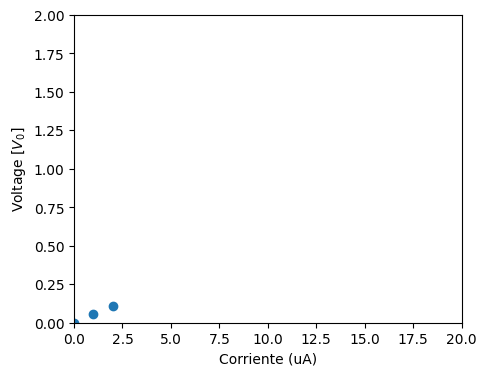

In [8]:

voltage_values=np.zeros(len(voltages))
print(voltage_values.shape)
for ii in range(len(voltages)):
	# plt.plot(times[ii],voltages[ii])
	max_idx=voltages[ii].shape[0]-1
	# print(voltages[ii][0:3])
	voltage_values[ii]=np.mean(voltages[ii][max_idx])


plt.scatter(currents,voltage_values)
plt.xlabel("Corriente (uA)")
plt.ylabel("Voltage [$V_0$]")
# plt.plot(times[1],voltages[1])
# plt.ylim(3.66,3.673)
plt.xlim(0,20)
plt.ylim(0,2)

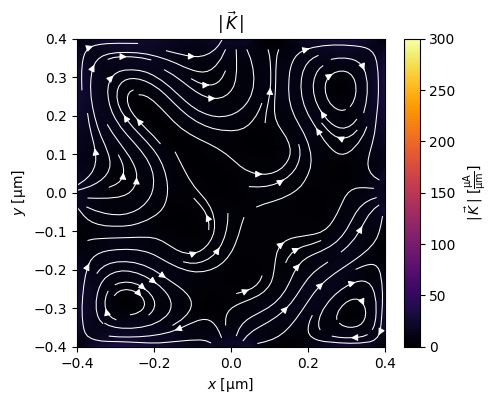

In [ ]:
fig, ax = zero_current_solution.plot_currents(min_stream_amp=0.075, vmin=0, vmax=300)

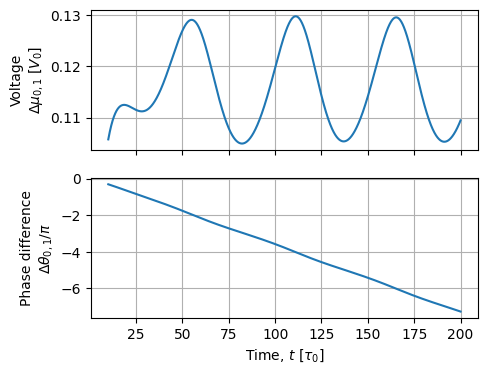

In [ ]:
fig, axes = zero_current_solution.dynamics.plot(tmin=10, mean_voltage=False)

In [11]:
zero_current_solution.dynamics.mean_voltage(tmin=200)

0.10943669766632115

In [ ]:
if MAKE_ANIMATIONS:
    field_current_video = make_video_from_solution(
        solutions[1],
        quantities=["order_parameter", "phase"],
        figsize=(8, 4),
        vmax_a=[1,1],
        vmin_a=[0,-1],
        cmap_b=["gist_rainbow", "hsv"],
    )
    display(field_current_video,)

['gist_rainbow', 'hsv']
